## Data Understanding and Pre-Processing

### Intoduction ###
For our project we will be exploring stock prices for 10 companies over 10 years. Our goal for this project will be to use clustering and regression to make predictions like prices and returns on stock market data. Some questions are any of the companies stock prices related as in when one drops do they both drop or when one is up does the other go up. We also want to clusters dates together using clustering to figure out if there are any trends related to time of the year or day of the week when it comes to stock prices. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.experimental import enable_hist_gradient_boosting  
from sklearn.ensemble import HistGradientBoostingRegressor

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [2]:
df = pd.read_csv('data.csv')
df.head()

,Company,Date,Close/Last,Volume,Open,High,Low
0,AAPL,07/17/2023,$193.99,50520160,$191.90,$194.32,$191.81
1,AAPL,07/14/2023,$190.69,41616240,$190.23,$191.1799,$189.63
2,AAPL,07/13/2023,$190.54,41342340,$190.50,$191.19,$189.78
3,AAPL,07-12-2023,$189.77,60750250,$189.68,$191.70,$188.47
4,AAPL,07-11-2023,$188.08,46638120,$189.16,$189.30,$186.60


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25160 entries, 0 to 25159
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Company     25160 non-null  object
 1   Date        25160 non-null  object
 2   Close/Last  25160 non-null  object
 3   Volume      25160 non-null  int64 
 4   Open        25160 non-null  object
 5   High        25160 non-null  object
 6   Low         25160 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.3+ MB


dataset info says we should have 5 string types, 1 int type, and 1 datetime type. i think we should have 1 string type (company), 1 int type (volume), 1 datetime, and the rest should be floats (monetary values).

In [4]:
df.columns = df.columns.str.lower()

Preprocessing is the first things that we did to make sure our models will come out the best. The first thing that we did is remove the money signs from our columnns that contain money so that they are easier to use for calculations. Following that we did checks to make sure that we knew all the information about our data. Being that there were no null values we didn't have to do much else. 

In [5]:
df = df.rename(columns={'close/last':'close'})

In [6]:
df['company'] = df['company'].astype('string')

df['date'] = pd.to_datetime(df['date'], format='mixed', errors='coerce')
                            
money_cols = ['close', 'open', 'high', 'low']
for col in money_cols:
    df[col] = df[col].replace(r'[\$,]', '', regex=True).astype(float)

df.head()

,company,date,close,volume,open,high,low
0,AAPL,2023-07-17,193.99,50520160,191.90,194.3200,191.81
1,AAPL,2023-07-14,190.69,41616240,190.23,191.1799,189.63
2,AAPL,2023-07-13,190.54,41342340,190.50,191.1900,189.78
3,AAPL,2023-07-12,189.77,60750250,189.68,191.7000,188.47
4,AAPL,2023-07-11,188.08,46638120,189.16,189.3000,186.60


making sure everything parsed without error (differences in formatting)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25160 entries, 0 to 25159
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   company  25160 non-null  string        
 1   date     25160 non-null  datetime64[ns]
 2   close    25160 non-null  float64       
 3   volume   25160 non-null  int64         
 4   open     25160 non-null  float64       
 5   high     25160 non-null  float64       
 6   low      25160 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), string(1)
memory usage: 1.3 MB


In [8]:
df.duplicated().sum()

0

In [9]:
df["company"].value_counts()

company
AAPL    2516
SBUX    2516
MSFT    2516
CSCO    2516
QCOM    2516
META    2516
AMZN    2516
TSLA    2516
AMD     2516
NFLX    2516
Name: count, dtype: Int64

there are 10 companies and an equal amount of market data for each

In [10]:
# sort data in chronological order by company
df = df.sort_values(by=['company', 'date'])
df.head(10)

,company,date,close,volume,open,high,low
2515,AAPL,2013-07-18,15.4199,218632537,15.4779,15.5311,15.3789
2514,AAPL,2013-07-19,15.1768,268548901,15.4679,15.4993,15.1554
2513,AAPL,2013-07-22,15.2254,207648981,15.3379,15.3482,15.1953
2512,AAPL,2013-07-23,14.9639,354477618,15.2143,15.2486,14.9539
2511,AAPL,2013-07-24,15.7325,591624923,15.6761,15.8782,15.5450
2510,AAPL,2013-07-25,15.6607,229432412,15.7393,15.7643,15.5646
2509,AAPL,2013-07-26,15.7496,200082264,15.5464,15.7514,15.5121
2508,AAPL,2013-07-29,15.9925,248025441,15.7429,16.0711,15.7214
2507,AAPL,2013-07-30,16.1900,308960556,16.0700,16.3268,16.0439
2506,AAPL,2013-07-31,16.1618,322499391,16.2496,16.3337,16.0511


## Feature Engineering


Following our pre processing we did some feature engineering to give us some more information about our data. Below you can see some of the features that we make that will help us later when creating our models. 

In [11]:
# difference between day's close and open prices
df['price_change'] = df['close']-df['open']
# percent change
df['price_change_pct'] = ((df['close'] - df['open']) / df['open']) * 100

# difference between day's highest and lowest prices (volatility)
df['daily_range'] = df['high'] - df['low']

# difference (gap) between current and previous close prices
df['prev_close'] = df.groupby('company')['close'].shift(1)
df['gap'] = df['open'] - df['prev_close']

# day/month/year
df['day_of_week'] = df['date'].dt.day_name()
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

# Calculate dailyt returns and volatility
df['daily_return_pct'] = df.groupby('company')['close'].pct_change() * 100
df['volatility_5d'] = df.groupby('company')['daily_return_pct'].rolling(window=5).std().reset_index(level=0, drop=True)

## Visualization

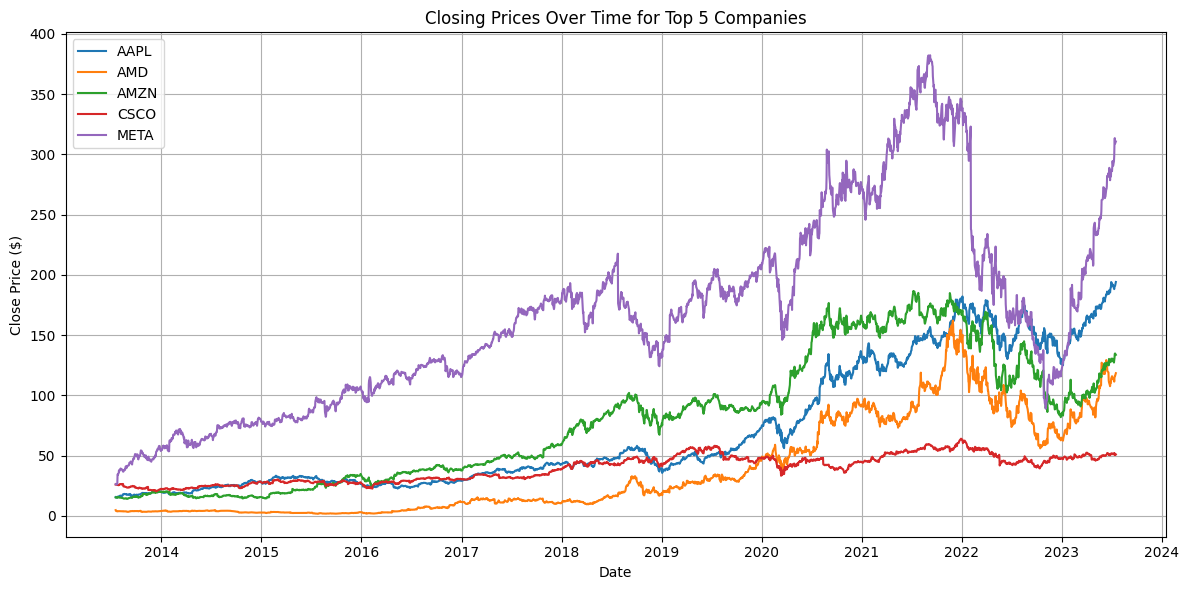

In [12]:
top_companies = df['company'].value_counts().head(5).index.tolist()
df_top = df[df['company'].isin(top_companies)]
plt.figure(figsize=(12, 6))
for company in top_companies:
    company_data = df_top[df_top['company'] == company]
    plt.plot(company_data['date'], company_data['close'], label=company)
plt.title("Closing Prices Over Time for Top 5 Companies")
plt.xlabel("Date")
plt.ylabel("Close Price ($)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Regression Model

In [13]:
#Predicting AAPL's closing price 250 days into the future
df_aapl = df[df['company'] == 'AAPL'].copy()
# 2. Lag features
lag_features = ['open', 'high', 'low', 'volume', 'gap', 'volatility_5d']
for col in lag_features:
    df_aapl[f'{col}_lag1'] = df_aapl[col].shift(1)
# 3. Create target
df_aapl['target_close'] = df_aapl['close'].shift(-250)
features = [f'{col}_lag1' for col in lag_features]
X = df_aapl[features]
y = df_aapl['target_close']
# 5. Drop rows where target is missing (don't drop X NaNs)
valid = y.notna()
X = X.loc[valid]
y = y.loc[valid]
# 6. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 7. Train HistGradientBoostingRegressor (handles NaNs in X)
model = HistGradientBoostingRegressor()
model.fit(X_train, y_train)
# 8. Predict and evaluate
y_pred = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

MSE: 96.4349201062013
R²: 0.9625270195942718


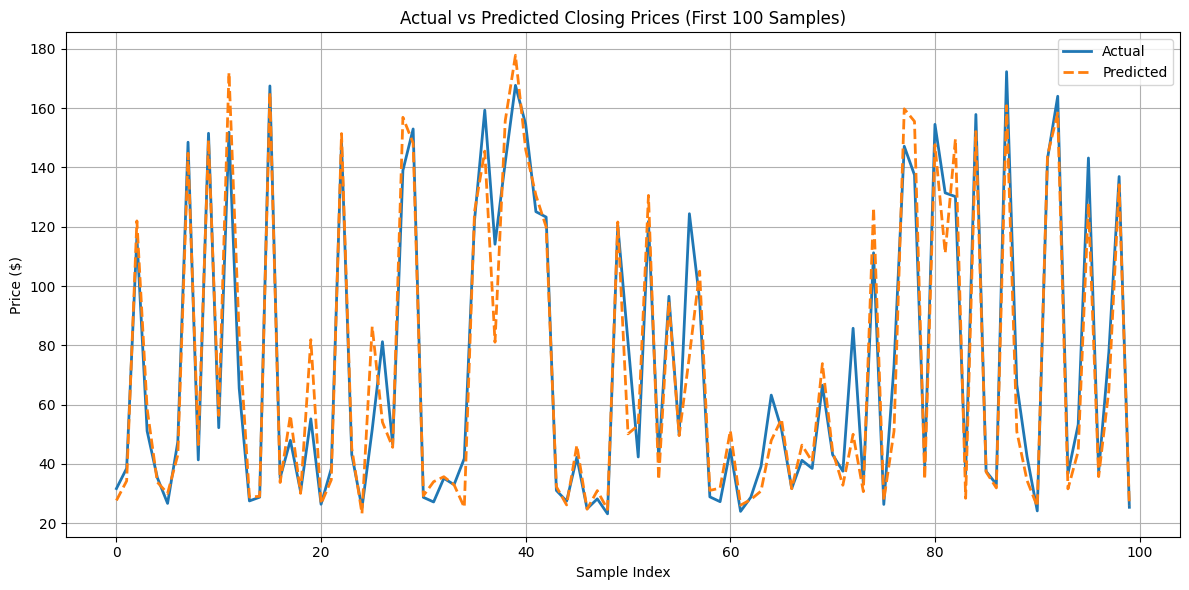

In [14]:
n = 100  # Number of points to show
plt.figure(figsize=(12, 6))
plt.plot(range(n), y_test[:n].values, label="Actual", linewidth=2)
plt.plot(range(n), y_pred[:n], label="Predicted", linewidth=2, linestyle='dashed')
plt.title("Actual vs Predicted Closing Prices (First 100 Samples)")
plt.xlabel("Sample Index")
plt.ylabel("Price ($)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [15]:
df = df.sort_values(by=['company', 'date'])
lag_features = ['open', 'high', 'low', 'volume', 'gap', 'volatility_5d']
for col in lag_features:
    df[f'{col}_lag1'] = df.groupby('company')[col].shift(1)
# 1-year forward return
df['target_return_1yr'] = df.groupby('company')['close'].shift(-250) / df['close'] - 1
# Final features
features = [f'{col}_lag1' for col in lag_features]
df_model = df.dropna(subset=features + ['target_return_1yr'])
# Add company indicator
X = pd.get_dummies(df_model[features + ['company']], columns=['company'])
y = df_model['target_return_1yr']
# Split and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = HistGradientBoostingRegressor()
model.fit(X_train, y_train)
# Predict and evaluate
y_pred = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R^2:", r2_score(y_test, y_pred))


MSE: 0.31009896968238426
R^2: 0.49945170256584004


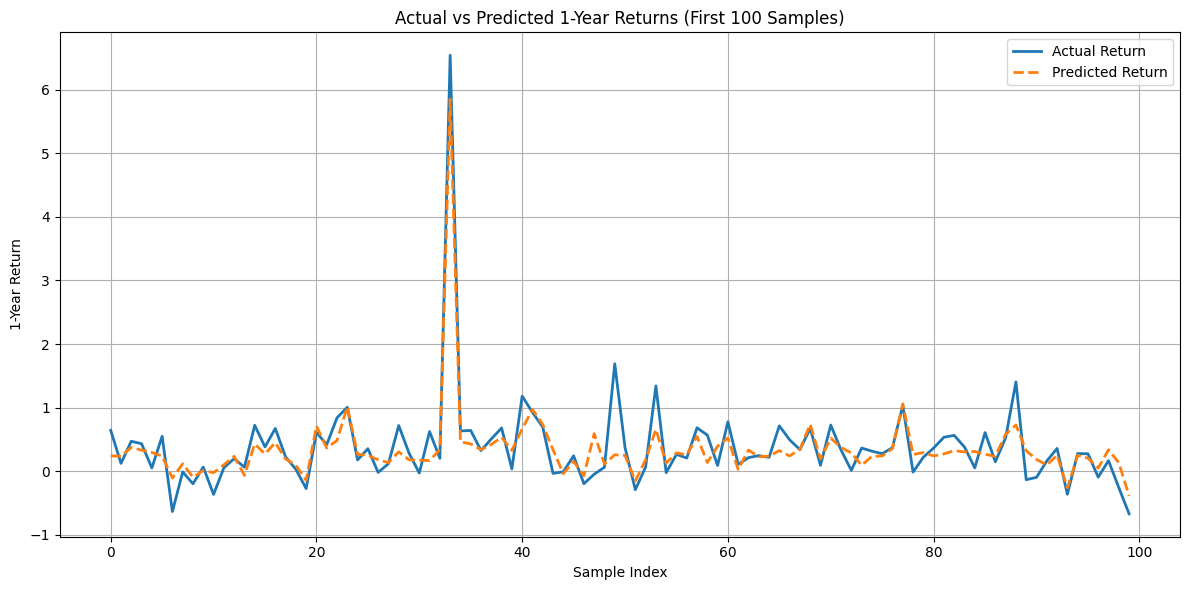

In [16]:
n = 100
plt.figure(figsize=(12, 6))
plt.plot(range(n), y_test[:n].values, label="Actual Return", linewidth=2)
plt.plot(range(n), y_pred[:n], label="Predicted Return", linewidth=2, linestyle='dashed')
plt.title("Actual vs Predicted 1-Year Returns (First 100 Samples)")
plt.xlabel("Sample Index")
plt.ylabel("1-Year Return")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

After our first run of regression we got some interesting results. On our first regression test we wanted to predict prices 250 days out. This gave us some important informatoin as our r2 score was very high. This very high for predicting stock prices. There is likely due to the sample of data being used and it being very similar not having much a shift so we are getting a dataset that is very similar. Stock prices are also affected by alot of outside factors which aren't factored into our dataset which is what makes prediciting prices so diffiucult. The next test we did was with predicting returns which is much more difficult than predicting prices. For this we were greated with a much lower r2 score and based on the graph of thedata you can see a lot of divergence. 

## Clustering

In [17]:
from sklearn.preprocessing import StandardScaler
features = ['open', 'high', 'low', 'volume', 'gap', 'volatility_5d']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_model[features])

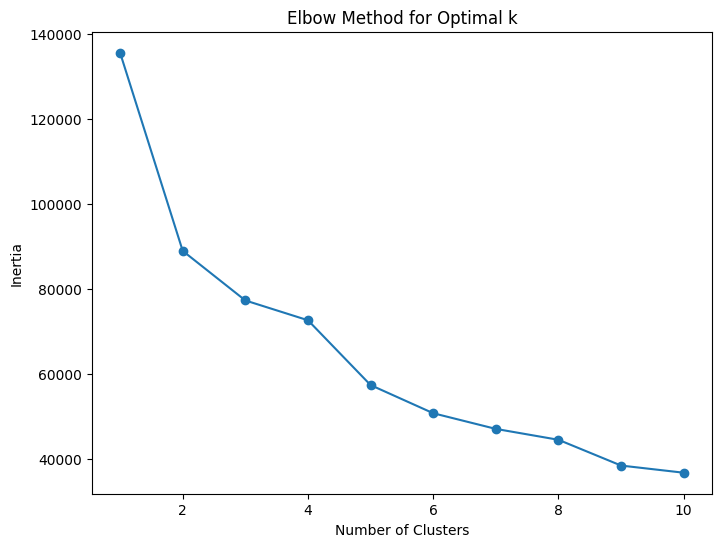

In [18]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [19]:
optimal_k = 3

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_model.loc[:, 'cluster'] = kmeans.fit_predict(X_scaled)


/var/folders/l6/r_xvzzfd4bz5k_gjy82lbn6r0000gn/T/ipykernel_44424/1069026384.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model.loc[:, 'cluster'] = kmeans.fit_predict(X_scaled)


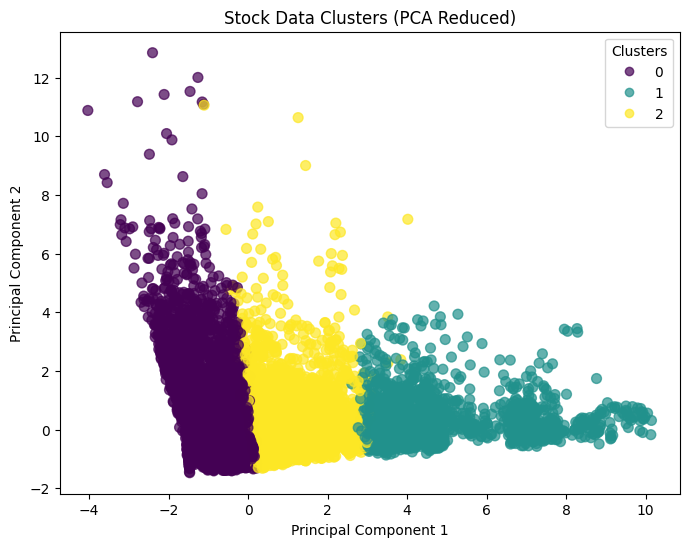

In [21]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_model['cluster'], cmap='viridis', s=50, alpha=0.7)
plt.title('Stock Data Clusters (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.show()

We have reduced the clusters to two principal components, where PC1 captures the most variance and PC2 captures the remaining variance. The clusters are well separated, suggesting that the features chosen capture distinct patterns in the data

Cluster 0 is clearly separated from the other 2, and may represent stocks with low volatility or different trading patterns compared to the other clusters. It is also the largest cluster and likely represents the most common behavior among the stocks. Cluster 1 appears to have a more scattered distribution, which may indicate that these stocks exhibit more variability in terms of volatility or price movement patterns. Cluster 2 stocks have different characteristics, possibly with higher volatility or larger fluctuations in stock prices.

In [22]:
centroids = kmeans.cluster_centers_
centroids_df = pd.DataFrame(centroids, columns=features)
print(centroids_df)

cluster_counts = df_model['cluster'].value_counts()
print(cluster_counts)


       open      high       low    volume       gap  volatility_5d
0 -0.501044 -0.501140 -0.501014  0.110611 -0.008014      -0.067318
1  2.767742  2.768470  2.765729 -0.501571  0.232447       0.217848
2  0.607381  0.607429  0.607969 -0.171022 -0.053796       0.133583
cluster
0    15742
2     5128
1     1730
Name: count, dtype: int64


The centroids represent the average values of the features for each of the clusters. Cluster 0 accounts for most of the data points, while cluster 1 is the smallest and seems to be more of an outlier, and cluster 2 falls between clusters 0 and 1 in terms of size and values.  

Cluster 0: The values for the features are all relatively low (negative), except for volume which has a positive value. This could represent a cluster with lower stock prices and less volatility or fluctuation. This cluster might represent "stable" stocks with less volatility.  

Cluster 1: The values are notably higher (positive values for all features), which suggests that this cluster represents stocks with higher prices and greater volatility. This cluster could indicate "high-growth" or "volatile" stocks, which might be of interest for traders looking for riskier investments.  

Cluster 2: Similar to Cluster 0, the values here are generally lower, but with volume being somewhat higher. This might represent stocks that are stable or have lower fluctuations in price. This cluster might represent stocks that are less volatile than those in Cluster 1 but still have some degree of movement.  

NameError: name 'sns' is not defined

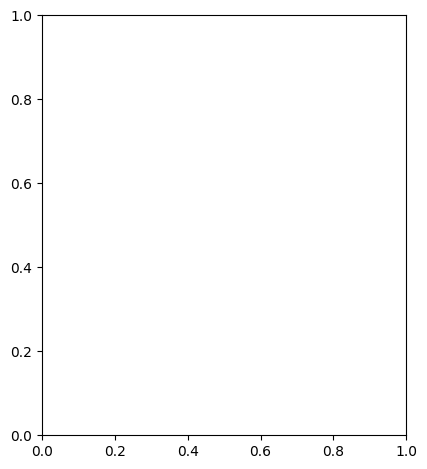

In [23]:
plt.figure(figsize=(16, 12))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='cluster', y=feature, data=df_model, palette="Set2", hue='cluster', legend=False)
    plt.title(f'{feature} by cluster')
    plt.xlabel('Cluster')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()


Based on the feature distributions within each cluster, we can confirm some of our initial centroid analysis. Cluster 0 is characterized by more stable stocks with lower prices, lower trading volumes, and lower volatility. These might represent low-risk, steady stocks. Cluster 1 represents high-volatility stocks with higher prices, larger trading volumes, and greater price swings. Cluster 2 exhibits intermediate characteristics in terms of price, volume, and volatility, suggesting a more balanced group compared to the other two.

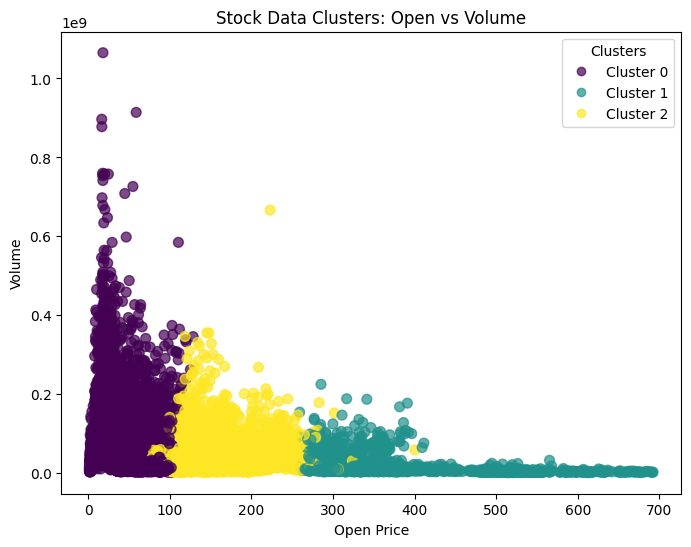

In [24]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df_model['open'], df_model['volume'], c=df_model['cluster'], cmap='viridis', s=50, alpha=0.7)
plt.title('Stock Data Clusters: Open vs Volume')
plt.xlabel('Open Price')
plt.ylabel('Volume')
plt.legend(handles=scatter.legend_elements()[0], labels=['Cluster 0', 'Cluster 1', 'Cluster 2'], title="Clusters")
plt.show()


The scatter plot of Open Price vs Volume reveals clear distinctions between the three clusters identified in the data. Cluster 0 consists of stocks with lower opening prices and trading volumes, likely representing more stable or less actively traded stocks. Cluster 1 shows a wider range of open prices and low trading volumes, suggesting stocks with some volatility but not extreme fluctuations. Cluster 2 contains stocks with slightly higher opening prices, yet similar trading volumes to cluster 1, indicating moderately priced stocks with similar levels of activity.

The shape of the clusters in this plot closely mirrors the pattern seen in the PCA analysis, with cluster 0 positioned in the lower-left, Cluster 1 on the right, and Cluster 2 towards the middle. This alignment suggests that open price and volume play significant roles in the clustering process, helping to separate stocks based on their price levels and market activity. The presence of outliers, particularly in cluster 0, highlights stocks with high trading volumes despite low prices, possibly indicating short-term fluctuations or unique trading patterns.

## Impact

The impacts of this type of work is that it can help investors invest in the correct stock. This is one of the biggest bussineses in the world as stock prices change so often so hitting on the correct stock and making money is a very lucrative business. With doing that though if your predictions end up being incorrect than lots of money can be lost so its a very volatile bussiness. 